In [13]:
import pandas as pd
import os


In [14]:
base_dir = "/Users/fabiancordenod/code/fqbq69/BIMpredict-/raw_data"

dfs = []
for i in range(1, 7):
    murs_path = os.path.join(base_dir, f"maquette{i}", f"murs{i}.csv")
    if os.path.exists(murs_path):
        # Cherche la ligne d'en-tête réelle
        with open(murs_path, encoding="utf-8") as f:
            for idx, line in enumerate(f):
                if line.startswith("Id;"):
                    header_row = idx
                    break
        try:
            df = pd.read_csv(murs_path, sep=';', header=header_row)
            dfs.append(df)
            print(f"Chargé : {murs_path} ({df.shape[0]} lignes, {df.shape[1]} colonnes)")
            print(df.head())
        except Exception as e:
            print(f"Erreur de parsing : {murs_path} -> {e}")
    else:
        print(f"Fichier non trouvé : {murs_path}")

if dfs:
    murs_concat = pd.concat(dfs, ignore_index=True)
    print(f"Total concaténé : {murs_concat.shape[0]} lignes, {murs_concat.shape[1]} colonnes")
else:
    murs_concat = pd.DataFrame()
    print("Aucun fichier murs.csv trouvé.")

murs_concat.head()

Chargé : /Users/fabiancordenod/code/fqbq69/BIMpredict-/raw_data/maquette1/murs1.csv (1589 lignes, 146 colonnes)
       Id 011EC_Lot 012EC_Ouvrage 013EC_Localisation 014EC_Mode Constructif  \
0  779920        GO           MUR          INTERIEUR           POUTRE VOILE   
1  780111        GO           MUR          INTERIEUR           POUTRE VOILE   
2  780661        GO           MUR          INTERIEUR                 BANCHE   
3  783007        GO           MUR          INTERIEUR                 BANCHE   
4  783554        GO           MUR          INTERIEUR           POUTRE VOILE   

           Nom           Hauteur Epaisseur                            AI  \
0  Voile BA 20  2,88000000000138       0,2  -0,0000000000013788124467113   
1  Voile BA 20  2,88000000000138       0,2  -0,0000000000013788124467113   
2  Voile BA 20  2,88000000000138       0,2  -0,0000000000013788124467113   
3  Voile BA 20  2,88000000000138       0,2  -0,0000000000013788124467113   
4  Voile BA 20  2,88000000000138 

,Id,011EC_Lot,012EC_Ouvrage,013EC_Localisation,014EC_Mode Constructif,Nom,Hauteur,Epaisseur,AI,AS,...,EIF_STR - Impact,EC_Type de Mur,ID MONTAGE,Désignation système,Réf DT,Nature_Ouvrage,Batiment,Mur armé,Affichage poteau,NIVEAU_STRUCTURE
0,779920,GO,MUR,INTERIEUR,POUTRE VOILE,Voile BA 20,"2,88000000000138","0,2","-0,0000000000013788124467113","2,88",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,780111,GO,MUR,INTERIEUR,POUTRE VOILE,Voile BA 20,"2,88000000000138","0,2","-0,0000000000013788124467113","2,88",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,780661,GO,MUR,INTERIEUR,BANCHE,Voile BA 20,"2,88000000000138","0,2","-0,0000000000013788124467113","2,88",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,783007,GO,MUR,INTERIEUR,BANCHE,Voile BA 20,"2,88000000000138","0,2","-0,0000000000013788124467113","2,88",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,783554,GO,MUR,INTERIEUR,POUTRE VOILE,Voile BA 20,"2,88000000000138","0,2","-0,0000000000013788124467113","2,88",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
if "011EC_Lot" in murs_concat.columns:
    y = murs_concat["011EC_Lot"].copy()
    murs_concat = murs_concat.drop(columns=["011EC_Lot"])
else:
    print("Colonne '011EC_Lot' non trouvée dans le DataFrame.")

In [16]:
import unicodedata
import re

def clean_col(col):

    col = ''.join(c for c in unicodedata.normalize('NFD', col) if unicodedata.category(c) != 'Mn')
    col = col.lower()
    col = re.sub(r"[ \-\(\)]", "_", col)
    col = re.sub(r"[^a-z0-9_]", "", col)
    col = re.sub(r"_+", "_", col)
    col = col.strip("_")
    return col

murs_concat.columns = [clean_col(c) for c in murs_concat.columns]
print(murs_concat.columns.tolist())

['id', '012ec_ouvrage', '013ec_localisation', '014ec_mode_constructif', 'nom', 'hauteur', 'epaisseur', 'ai', 'as', 'sols_en_intersection', 'sols_coupes_u', 'sols_coupes_ids', 'sols_coupants_u', 'sols_coupants_ids', 'sol_au_dessus', 'sol_en_dessous', 'fenetres', 'portes', 'ouvertures', 'murs_imbriques', 'mur_multicouche', 'mur_empile', 'profil_modifie', 'image', 'categorie', 'section', 'type_predefini_difc', 'exporter_au_format_ifc_sous', 'exporter_au_format_ifc', 'ifcguid', 'a_une_association', 'enrobage_darmature_autres_faces', 'enrobage_darmature_face_interieure', 'enrobage_darmature_face_exterieure', 'variantes', 'extension_inferieure', 'extension_superieure', 'volume', 'surface', 'phase_de_demolition', 'phase_de_creation', 'commentaires', 'longueur', 'famille_et_type', 'famille', 'type', 'nom_de_la_famille', 'nom_du_type', 'id_du_type', 'lie_au_volume', 'structure', 'identifiant', 'ligne_de_justification', 'utilisation_structurelle', 'partie_inferieure_attachee', 'partie_superieure

In [17]:
# Liste des colonnes cibles que tu veux prédire
targets = ["011ec_lot", "012ec_ouvrage", "013ec_localisation", "014ec_mode_constructif"]  # Remplace par les noms exacts de tes cibles

# On vérifie qu'elles existent dans le DataFrame
targets = [t for t in targets if t in murs_concat.columns]

# On isole les targets dans un DataFrame y_multi
y_multi = murs_concat[targets].copy()

# On retire les targets de X
X = murs_concat.drop(columns=targets)



print("Targets sélectionnées :", y_multi.columns.tolist())
print("X shape :", X.shape)
print("y_multi shape :", y_multi.shape)

Targets sélectionnées : ['012ec_ouvrage', '013ec_localisation', '014ec_mode_constructif']
X shape : (2867, 156)
y_multi shape : (2867, 3)


In [18]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Encodage des variables catégorielles
X_enc = pd.get_dummies(X, drop_first=True)
X_enc = X_enc.fillna(0)

# On retire les lignes où au moins une target est manquante
valid_idx = y_multi.dropna().index
X_enc = X_enc.loc[valid_idx]
y_multi_clean = y_multi.loc[valid_idx]

X_train, X_test, y_train, y_test = train_test_split(X_enc, y_multi_clean, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Pour chaque target, tu peux afficher l'importance des features
for i, target in enumerate(y_multi_clean.columns):
    print(f"\n--- Importance des features pour la target : {target} ---")
    importances = rf.feature_importances_
    indices = np.argsort(importances)[::-1]
    features = X_enc.columns
    for f in range(20):  # top 20
        print(f"{features[indices[f]]}: {importances[indices[f]]:.4f}")


--- Importance des features pour la target : 012ec_ouvrage ---
082ec_clef_logetex_VOILES CSP FACADES: 0.0268
083ec_clef_carbone_VOILES CSP FACADES: 0.0238
086ec_clef_modeconstructif_VOILE EXT: 0.0223
082ec_clef_logetex_VOILES INTERIEURS CSP: 0.0223
081ec_clef_generique_GO-MUR-EXTERIEUR-BANCHE: 0.0211
086ec_clef_modeconstructif_VOILE INT: 0.0185
id: 0.0144
086ec_clef_modeconstructif_POUTRE VOILE: 0.0121
id_du_type: 0.0114
081ec_clef_generique_GO-MUR-INTERIEUR-POUTRE VOILE: 0.0107
083ec_clef_carbone_VOILES INTERIEURS CSP: 0.0107
081ec_clef_generique_GO-MUR-INTERIEUR-BANCHE: 0.0106
decalage_superieur_0: 0.0100
sol_au_dessus: 0.0099
sol_en_dessous: 0.0083
005ec_code_etage: 0.0073
sols_coupants_u: 0.0070
commentaires_Ratios OK: 0.0069
enrobage_darmature_face_interieure_Enrobage d'armature 1 <25 mm>: 0.0067
034ec_ratiots_m2_4: 0.0065

--- Importance des features pour la target : 013ec_localisation ---
082ec_clef_logetex_VOILES CSP FACADES: 0.0268
083ec_clef_carbone_VOILES CSP FACADES: 0.023

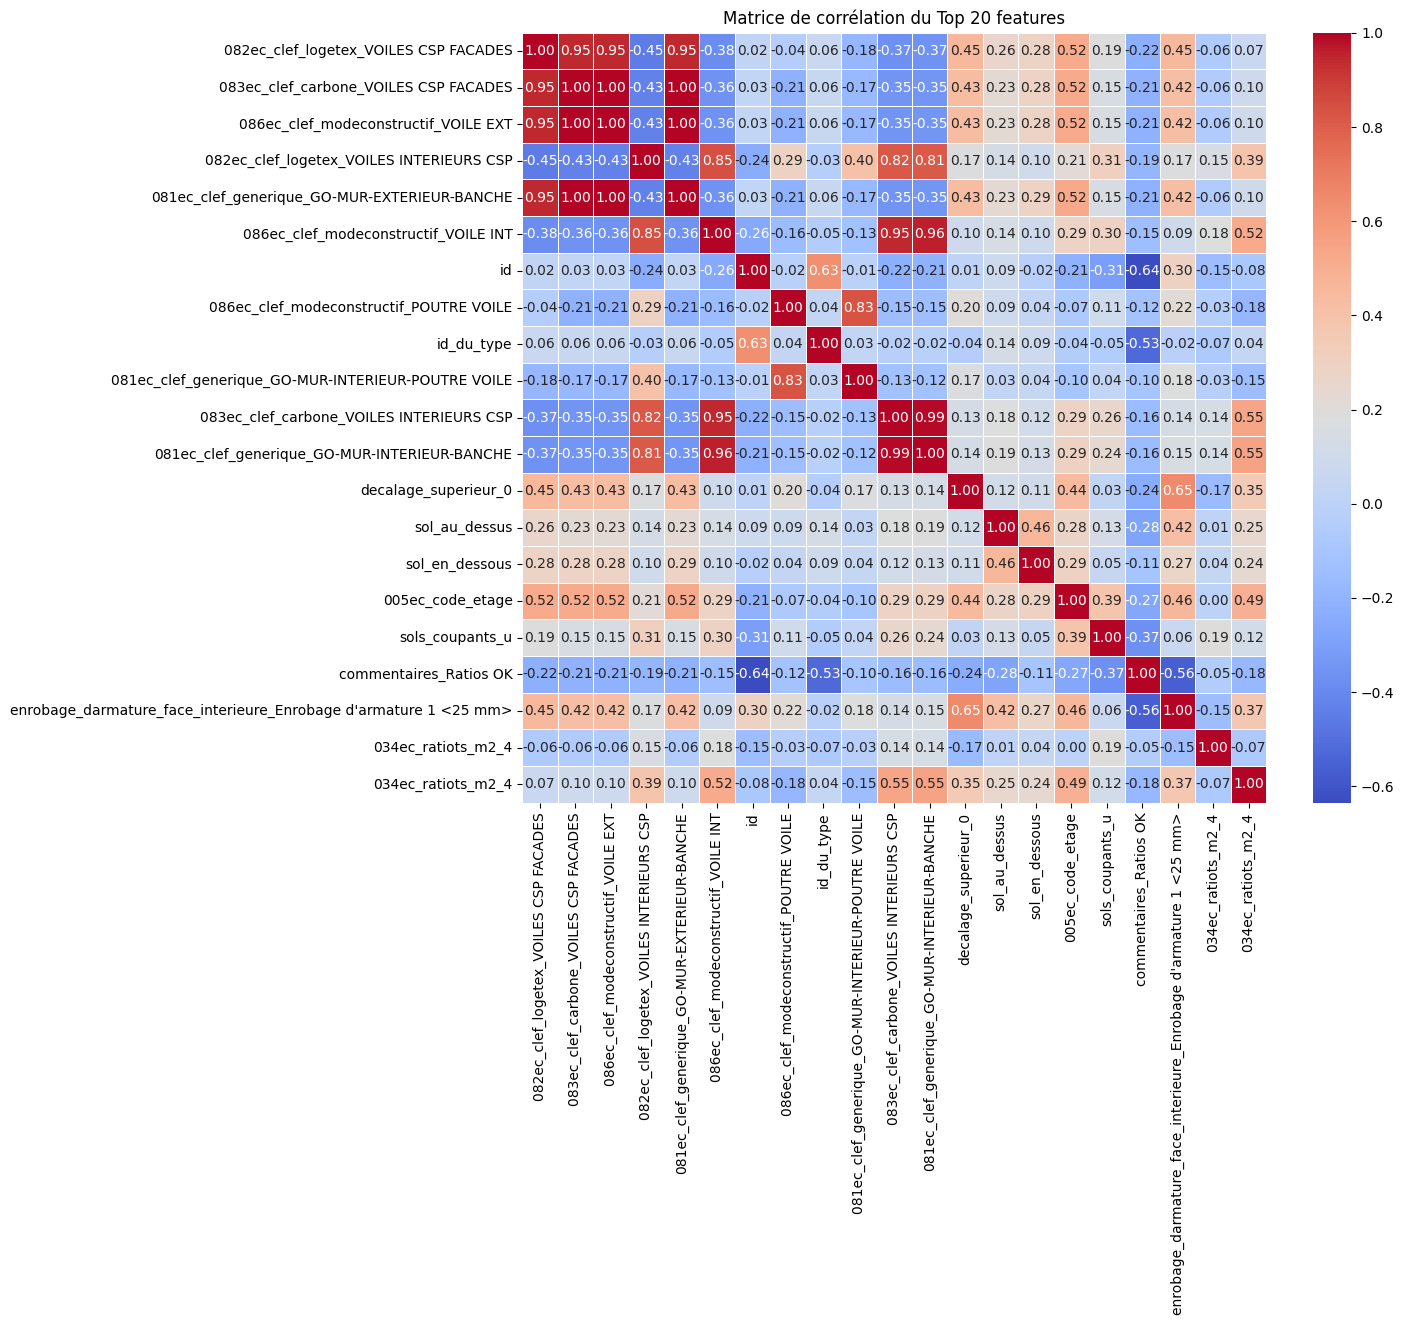

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Supposons que tu as déjà calculé importances, indices, features
# (par exemple pour la première target)
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
features = X_enc.columns

# Sélection du top 20 features
top20_features = features[indices][:20]

# Sous-ensemble du DataFrame avec ces features
X_top20 = X_enc[top20_features]

# Calcul de la matrice de corrélation
corr = X_top20.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matrice de corrélation du Top 20 features")
plt.show()

In [20]:
from sklearn.metrics import accuracy_score

for col in y_train.columns:
	train_acc = accuracy_score(y_train[col], rf.predict(X_train)[:, y_train.columns.get_loc(col)])
	test_acc = accuracy_score(y_test[col], rf.predict(X_test)[:, y_test.columns.get_loc(col)])
	print(f"Score train ({col}): {train_acc:.3f}")
	print(f"Score test  ({col}): {test_acc:.3f}")

Score train (012ec_ouvrage): 1.000
Score test  (012ec_ouvrage): 0.993
Score train (013ec_localisation): 1.000
Score test  (013ec_localisation): 0.956
Score train (014ec_mode_constructif): 1.000
Score test  (014ec_mode_constructif): 0.969


In [21]:
rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)

In [22]:
rf = RandomForestClassifier(n_estimators=100, max_features="sqrt", random_state=42)

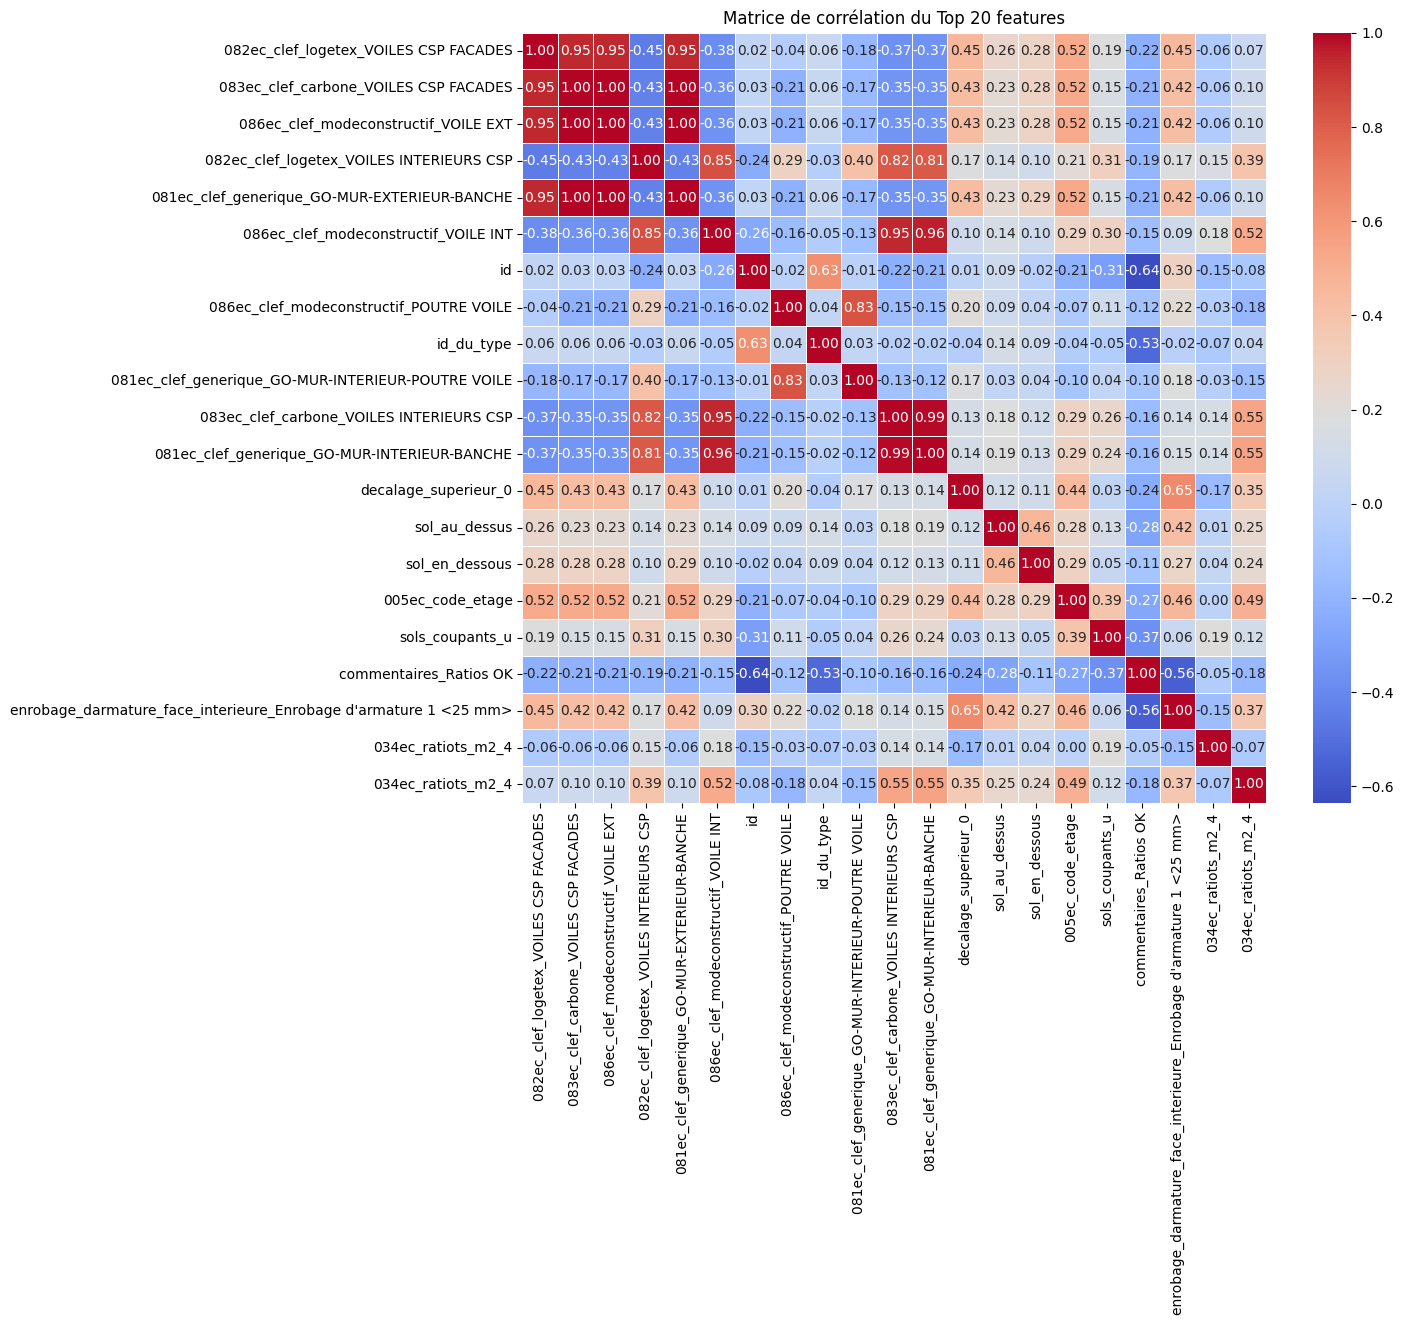

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Refit the classifier if needed (in case rf was redefined)
if not hasattr(rf, "estimators_"):
	rf.fit(X_train, y_train)

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
features = X_enc.columns

# Sélection du top 20 features
top20_features = features[indices][:20]

# Sous-ensemble du DataFrame avec ces features
X_top20 = X_enc[top20_features]

# Calcul de la matrice de corrélation
corr = X_top20.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matrice de corrélation du Top 20 features")
plt.show()